## WINE QUALITY PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#### Data Collection

##### Loading the dataset

In [3]:
dataset = pd.read_csv("winequality-red.csv")

###### Checking the first 5 and the last 5 rows of the dataset

In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
dataset.shape

(1599, 12)

##### Checking the datatypes of the dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Checking Missing Values

In [14]:
dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values in the dataset

#### Data Analysis and Visualization

##### Statistical Measures of the dataset

In [15]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


##### Checking the number of values for each quality

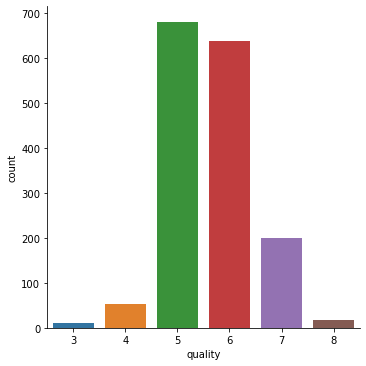

In [20]:
sns.catplot(x = "quality", data=dataset, kind = "count")

##### Volatile Acidity vs Quality

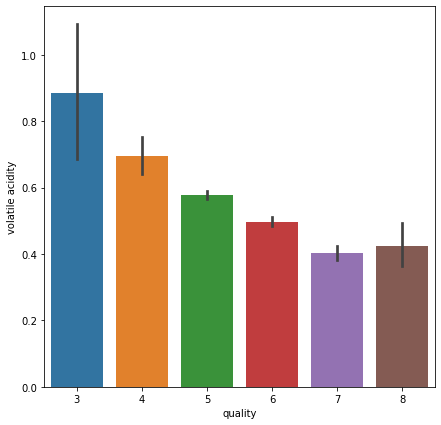

In [24]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="volatile acidity", data=dataset)
plt.show()

We can see that as the volatile acidity level increases the quality of the wine reduces and optimum range of 0.5 gives the best quality in the wine

#### Citric Acid Vs Quality

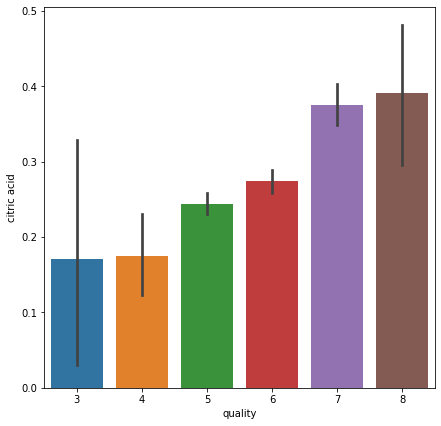

In [25]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="citric acid", data=dataset)
plt.show()

In the above graph, we can see that citric acid is directly proportional to the quality of the wine i.e the higher the citric acid the better the wine quality

##### Fixed Acidity Vs Quality

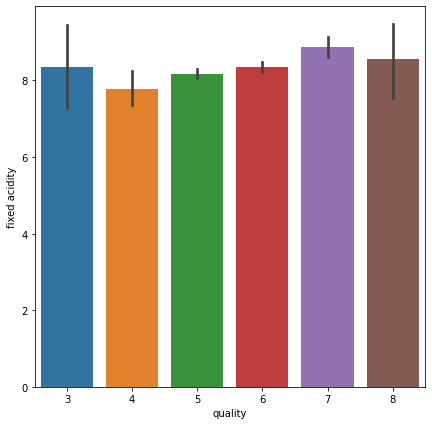

In [27]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="fixed acidity", data=dataset)
plt.show()

We can see in the above graph that there is not much relation with the level of the fixed acidity to the quality of the wine

##### Residual Sugar Vs Quality

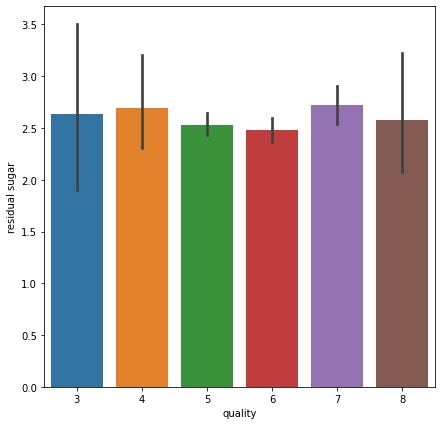

In [29]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="residual sugar", data=dataset)
plt.show()

We can see in the above graph that there is very less relation with the level of residual sugar to the quality of the wine

##### Chlorides Vs Quality

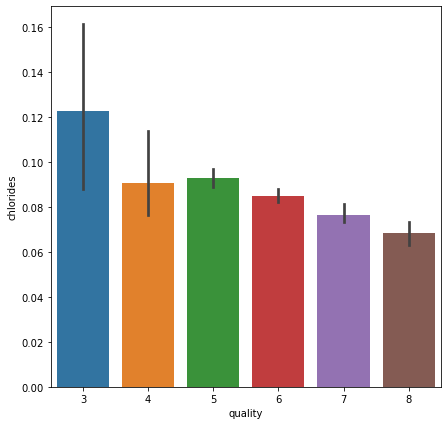

In [30]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="chlorides", data=dataset)
plt.show()

We can see in the above graph that thereas the level of chlorides increases to the quality of the wine is reduced

##### Free Sulfur Dioxide Vs Quality

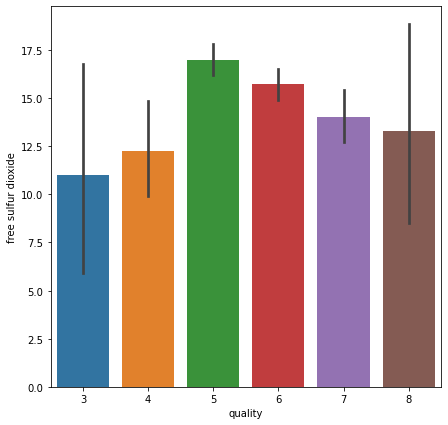

In [31]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="free sulfur dioxide", data=dataset)
plt.show()

##### Total Sulfur Dioxide Vs Quality

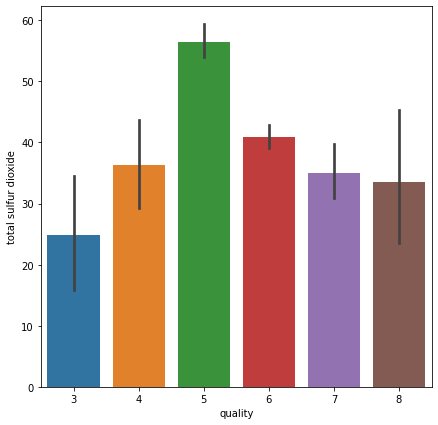

In [32]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="total sulfur dioxide", data=dataset)
plt.show()

##### Density Vs Quality

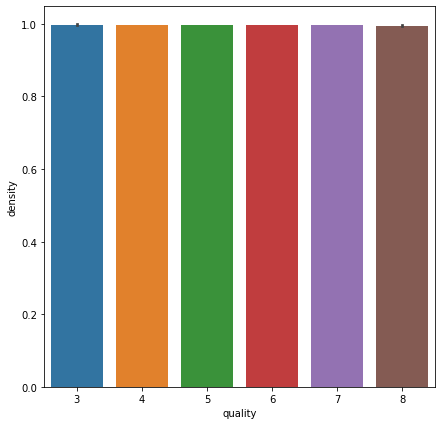

In [33]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="density", data=dataset)
plt.show()

We can see in the above graph that there is no relation with the density to the quality of the wine

##### pH Vs Quality

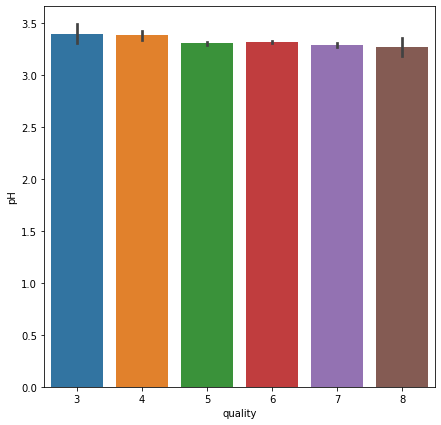

In [34]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="pH", data=dataset)
plt.show()

We can see in the above graph that there is no relation with the level of pH to the quality of the wine

##### Sulphates Vs Quality

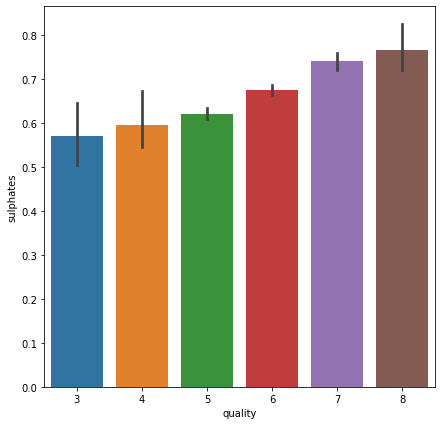

In [35]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="sulphates", data=dataset)
plt.show()

##### Alcohol Vs Quality

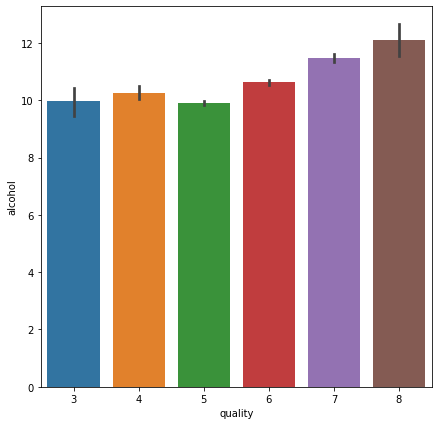

In [36]:
plot = plt.figure(figsize =(7,7))
sns.barplot(x="quality", y="alcohol", data=dataset)
plt.show()

We can see in the above graph that there is high relation with the level of alcohol to the quality of the wine

##### Correlation of Columns

In [40]:
correlation=dataset.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


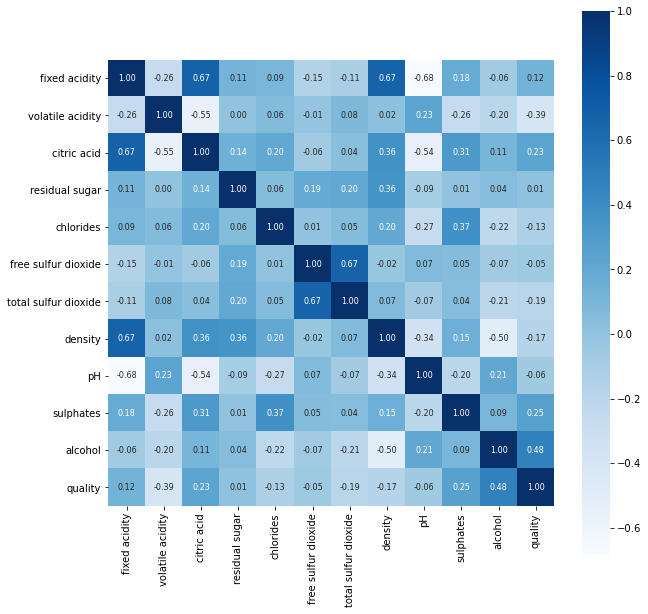

In [49]:
plt.figure(figsize = (10,10))
sns.heatmap(data=correlation,cbar=True ,annot=True, square=True, fmt = ".2f", annot_kws={"size":8}, cmap="Blues" )
plt.show()

### Data Preprocessing

##### Separate the Data and Labels

In [56]:
X=dataset.drop("quality", axis=1)

In [54]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


##### Label Binarization

In [57]:
y= dataset["quality"].apply(lambda y_value: 1 if y_value>=7 else 0)

We have changed the values of the quality of 7 and 8 to 1 which is good and others to bad which is 0

In [59]:
y.unique()

array([0, 1], dtype=int64)

##### Splitting the data to train and test data 

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


#### Model Training

#### Random Forest Classifier

In [64]:
model= RandomForestClassifier()

In [65]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Model Evaluation

##### Accuracy on Test Data

In [66]:
y_pred = model.predict(X_test)

In [70]:
pd.DataFrame({"Actual Values": y_test ,"Predicted values":y_pred})

,Actual Values,Predicted values
147,0,0
937,0,0
877,0,0
1000,1,0
73,0,0
...,...,...
841,0,0
889,0,0
1145,0,0
1476,0,0


In [72]:
print("Accuracy :",accuracy_score(y_test,y_pred))

Accuracy : 0.9375


##### We have achieved an accuracy of 93.75% which is good and shows the model has been trained well

#### Build a predictive System

In [73]:
new_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

In [75]:
##Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(new_data)

In [77]:
## Reshape the data as we are predicting label for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped


array([[ 7.3   ,  0.65  ,  0.    ,  1.2   ,  0.065 , 15.    , 21.    ,
         0.9946,  3.39  ,  0.47  , 10.    ]])

In [78]:
prediction = model.predict(input_data_reshaped)

In [79]:
print(prediction)

[1]


In [80]:
if (prediction[0]==1):
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

Good Quality Wine
